In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
parsing_df = pd.read_excel('data/Data_TSUM.xlsx', sheet_name='Data_Parsing')
company_df = pd.read_excel('data/Data_TSUM.xlsx', sheet_name ='Data_Company')

In [4]:
parsing_df['producer_id'] = parsing_df['producer_id'].astype('string')
for now in ['_', '-', '~', '\\', '/']:
    parsing_df['producer_id'] = parsing_df['producer_id'].str.replace(now, '')
    parsing_df['producer_color'] = parsing_df['producer_color'].str.replace(now, '')
company_df.head(20)


,brand,Category,item_id,color_id,current price
0,Valentino,Shoes,aaaaa111111,black,247
1,Valentino,Shoes,aaaaa111112,black,161
2,Valentino,Shoes,aaaaa111113,black,234
3,Valentino,Shoes,aaaaa111114,black,167
4,Valentino,Shoes,aaaaa111115,black,153
5,Valentino,Shoes,aaaaa111116,black,265
6,Valentino,Shoes,aaaaa111117,black,169
7,Valentino,Shoes,aaaaa111118,white,265
8,Valentino,Shoes,aaaaa111119,white,250
9,Valentino,Shoes,aaaaa111120,white,255


In [5]:
merged_df = parsing_df.join(company_df.set_index(['item_id', 'color_id']), on=['producer_id', 'producer_color'], rsuffix='right')
merged_df['difference'] = (merged_df['price'] - merged_df['current price']) / merged_df['current price'] * 100

mean_dif = merged_df.groupby(['brand', 'Category'])['difference'].mean()
mean_dif

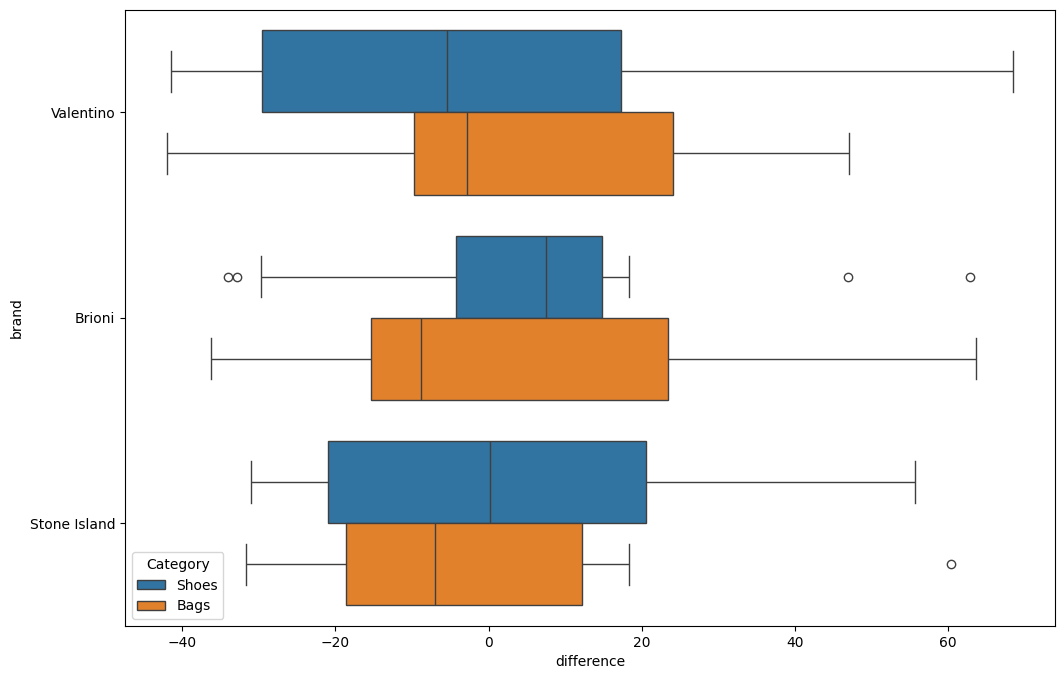

In [13]:
fig=plt.figure(figsize=(12, 8))
plot = sns.boxplot(
    merged_df,
    x='difference',
    y='brand',
    hue='Category',
    orient='h'
)


In [11]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outlier, cleaned = outliers_iqr(merged_df, 'difference')
outlier

,brand,Category,producer_id,producer_color,price,brandright,Categoryright,current price,difference
